In [80]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 


In [81]:

df = pd.read_csv('ctcdata.csv')
df.describe()

,Redshift,Hubble parameter(km/s/Mpc),Error in Hubble Parameter(km/s/Mpc)
count,28.000000,28.000000,28.000000
mean,0.678429,106.978571,18.017857
std,0.558925,42.067559,13.356537
min,0.070000,68.600000,4.000000
25%,0.252500,76.825000,8.000000
50%,0.536500,91.000000,14.000000
75%,0.885000,119.000000,20.750000
max,2.300000,224.000000,62.000000


In [82]:
df.head()


,Redshift,Hubble parameter(km/s/Mpc),Error in Hubble Parameter(km/s/Mpc)
0,0.070,69.0,19.6
1,0.100,69.0,12.0
2,0.120,68.6,26.2
3,0.170,83.0,8.0
4,0.179,75.0,4.0


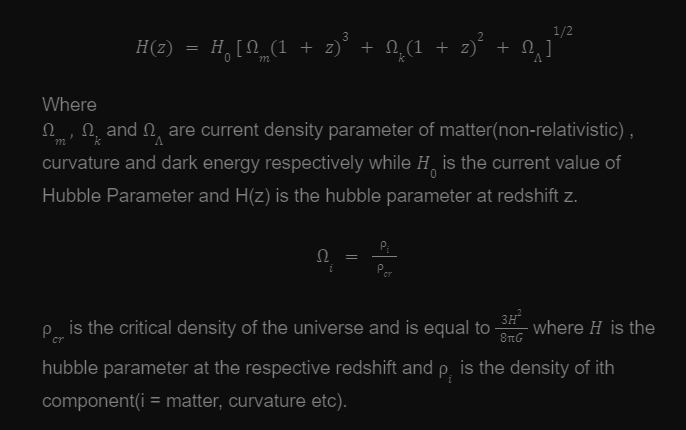

```H(z) = H0 [ Omega_m*(1 + z)**3 + k*(1 + z)**2 + Omega_A ]**0.5```  

H0 =  73.04 +/- 1.04 km s-1Mpc-1  
**Given a dataset for Hubble parameter at various redshifts, constrain and find the best fit values for Omega_m , Omega_k and plot 1 and 2D marginalized probability distributions for all three parameters and report uncertainty corresponding to 1,2 and 3**



In [83]:
h0 =  73.04; e0 = 1.04; h0u = h0 + e0; h0l = h0 - e0 

df.columns = ['z', 'hz', 'e']
df.head()

,z,hz,e
0,0.070,69.0,19.6
1,0.100,69.0,12.0
2,0.120,68.6,26.2
3,0.170,83.0,8.0
4,0.179,75.0,4.0


In [84]:
# df
# tell the 33% and 66% percentile of the data
z33 = df.quantile(0.33)['z']; z66 = df.quantile(0.66)['z']
df.quantile([0.33, 0.66])


,z,hz,e
0.33,0.34370,82.964,11.64
0.66,0.77182,102.794,17.82


```Sqrt( H(z)/H0 ) = A*Omega_m + B*Omega_k + Omega_l```  
```Sqrt( H(z)/H0 ) = a*m + b*k + l```

In [85]:
df['a'] = (1+df['z'])**3
df['b'] = (1+df['z'])**2
df['hz-2'] = ((df['hz']-df['e'])/(h0+e0))**2
df['hz-1'] = ((df['hz']-df['e']*0.5)/(h0-e0))**2
df['hz0'] = ((df['hz']/h0))**2
df['hz1'] = ((df['hz']+df['e']*0.5)/(h0+e0))**2
df['hz2'] = ((df['hz']+df['e'])/(h0-e0))**2
# Add a column of hz1.5 = (hz1+hz2)/2 and hz-1.5 = (hz-1+hz-2)/2
alp = 0.4; bet = 2 - alp
df['hz1.5'] = (alp*df['hz1'] + bet*df['hz2'])/2
df['hz-1.5'] = (alp*df['hz-1'] + bet*df['hz-2'])/2
df['hzu'] = df['hz0'] +1.5*(df['hz2'] - df['hz0'])
df['hzl'] = df['hz0'] -1.5*(df['hz0'] - df['hz-2'])
df.head()

# We added a few columns to the dataframe for defining various error bounds
# Here, hz0 is the central value of Sq(Hz/H0)
# Hz1 and Hz-1 are loosely the upper and lower bounds of the error
# Hz2 and Hz-2 are the upper and lower bounds of the error (hz+e)/(h0-e0) and (hz-e)/(h0+e0)
# Hz1.5 and Hz-1.5 are the average of the two bounds
# Hzu and Hzl are defined 1.5 times the difference between the central value and the upper and lower bounds
# i.e. Hzu = hz0 + 1.5*(hz2 - hz0) and Hzl = hz0 - 1.5*(hz0 - hz-2)


,z,hz,e,a,b,hz-2,hz-1,hz0,hz1,hz2,hz1.5,hz-1.5,hzu,hzl
0,0.070,69.0,19.6,1.225043,1.144900,0.444684,0.676049,0.892435,1.131489,1.514267,1.437711,0.490957,1.825183,0.220809
1,0.100,69.0,12.0,1.331000,1.210000,0.592036,0.765625,0.892435,1.024992,1.265625,1.217498,0.626753,1.452220,0.441836
2,0.120,68.6,26.2,1.404928,1.254400,0.327589,0.594184,0.882118,1.216304,1.733611,1.630150,0.380908,2.159358,0.050325
3,0.170,83.0,8.0,1.601613,1.368900,1.024992,1.203897,1.291322,1.379230,1.597415,1.553778,1.060773,1.750462,0.891827
4,0.179,75.0,4.0,1.638858,1.390041,0.918575,1.027971,1.054389,1.080387,1.203897,1.179195,0.940454,1.278650,0.850668


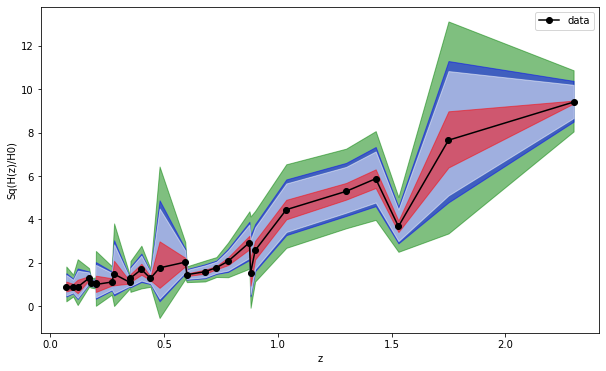

In [86]:
# H(z) = H0 [ Omega_m*(1 + z)**3 + k*(1 + z)**2 + Omega_A ]**0.5
# H0 =  73.04 +/- 1.04 km s-1Mpc-1 

# Thus, we can write the equation as:
#  Omega_m*(1 + z)**3 + k*(1 + z)**2 + Omega_A = (H(z)/H0)**2
# # Sq( H(z)/H0 ) = A*Omega_m + B*Omega_k + Omega_l  
# # Sq( H(z)/H0 ) = a*m + b*k + l
# a = (1+z)**3
# b = (1+z)**2
# l = Omega_l
# m = Omega_m
# k = Omega_k


# hz-2 is the lower error bar
# hz+2 is the upper error bar
# hz0 is the central value

def model(z, m, k, l):
    return (m*(1+z)**3 + k*(1+z)**2 + l)

def chi2(m, k, l):
    return np.sum((df['hz0'] - model(df['z'], m, k, l))**2)

def plot_tolerances(m, k, l):
    plt.figure(figsize=(10, 6))
    plt.plot(df['z'], df['hz0'], 'o', label='data')
    z = np.linspace(0, 2, 100)
    plt.plot(z, model(z, m, k, l), label='best fit model')
    plt.fill_between(df['z'], df['hzl'], df['hzu'], color='gray', alpha=0.5)
    plt.xlabel('z')
    plt.ylabel('Sq(H(z)/H0)')
    plt.legend()
    plt.show()

def tolerance_boundaries():
    plt.figure(figsize=(10, 6))
    plt.plot(df['z'], df['hz0'], 'o-', color='black', label='data')
    z = np.linspace(0, 2, 100)
    # plt.plot(z, model(z, 0.3, 0, 0.7), label='best fit model')
    plt.fill_between(df['z'], df['hzl'], df['hzu'], color='green', alpha=0.5)
    plt.fill_between(df['z'], df['hz-2'], df['hz2'], color='blue', alpha=0.5)
    plt.fill_between(df['z'], df['hz-1.5'], df['hz1.5'], color='white', alpha=0.5)
    plt.fill_between(df['z'], df['hz-1'], df['hz1'], color='red', alpha=0.5)
    plt.xlabel('z')
    plt.ylabel('Sq(H(z)/H0)')
    plt.legend()
    plt.show()

tolerance_boundaries()

Find the initial value of the parameters. Choose 3 rows from the data with minimum error and calculate the value of m, k, and l by solving the 3 linear equations.  
```Sq(H(z)/H0) = a*m + b*k + l```  
```Sq(H(z)/H0) = a1*m + b1*k + l```  
```Sq(H(z)/H0) = a2*m + b2*k + l```  

```m = (a1*b2 - a2*b1)/(a*b2 - a2*b)```  
```k = (a*b1 - a1*b)/(a*b2 - a2*b)```  
```l = (a1*b - a*b1)/(a*b2 - a2*b)```  

```a = Sq(H(z1)/H0)```  
```b = Sq(H(z2)/H0)```  
```a1 = Sq(H(z3)/H0)```  
```b1 = (1+z1)**2```  
```a2 = (1+z2)**2```  
```b2 = (1+z3)**2```  
  
Thus  
```m = (a1*(1+z3)**2 - (1+z2)**2*Sq(H(z3)/H0))/(Sq(H(z1)/H0)*(1+z3)**2 - (1+z2)**2*Sq(H(z1)/H0))```  
```k = (Sq(H(z1)/H0)*(1+z3)**2 - a1*(1+z2)**2)/(Sq(H(z1)/H0)*(1+z3)**2 - (1+z2)**2*Sq(H(z1)/H0))```  
```l = (a1*(1+z2)**2*Sq(H(z1)/H0) - Sq(H(z1)/H0)*(1+z2)**2*Sq(H(z3)/H0))/(Sq(H(z1)/H0)*(1+z3)**2 - (1+z2)**2*Sq(H(z1)/H0))```  


In [87]:
_ = '''```Sq(H(z)/H0) = a*m + b*k + l```  
```Sq(H(z)/H0) = a1*m + b1*k + l```   
```Sq(H(z)/H0) = a2*m + b2*k + l```   
  '''
df.sort_values(by='e').head() 
# 4,5, 9 are the lowest errors 


,z,hz,e,a,b,hz-2,hz-1,hz0,hz1,hz2,hz1.5,hz-1.5,hzu,hzl
4,0.179,75.0,4.0,1.638858,1.390041,0.918575,1.027971,1.054389,1.080387,1.203897,1.179195,0.940454,1.278650,0.850668
5,0.199,75.0,5.0,1.723684,1.437601,0.892882,1.013937,1.054389,1.094464,1.234568,1.206547,0.917093,1.324657,0.812129
9,0.350,76.3,5.6,2.460375,1.822500,0.910829,1.042101,1.091258,1.140121,1.293906,1.263149,0.937083,1.395230,0.820614
15,0.600,87.9,6.1,4.096000,2.560000,1.219283,1.388797,1.448292,1.507313,1.704475,1.665043,1.253186,1.832567,1.104779
17,0.730,97.3,7.0,5.177717,2.992900,1.485845,1.697230,1.774615,1.851480,2.098474,2.049075,1.528122,2.260404,1.341460


In [88]:

# m = (df['a'].iloc[5]*df['b'].iloc[9] - df['a'].iloc[9]*df['b'].iloc[5])/(df['a'].iloc[4]*df['b'].iloc[9] - df['a'].iloc[9]*df['b'].iloc[4])
# k = (df['a'].iloc[4]*df['b'].iloc[9] - df['a'].iloc[5]*df['b'].iloc[4])/(df['a'].iloc[4]*df['b'].iloc[9] - df['a'].iloc[9]*df['b'].iloc[4])
# l = (df['a'].iloc[5]*df['b'].iloc[4]*df['hz0'].iloc[4] - df['a'].iloc[4]*df['b'].iloc[5]*df['hz0'].iloc[5])/(df['a'].iloc[4]*df['b'].iloc[9] - df['a'].iloc[9]*df['b'].iloc[4])

# print(m, k, l)



X_matrix: [ 0.73432639 -1.309702    1.67147187]


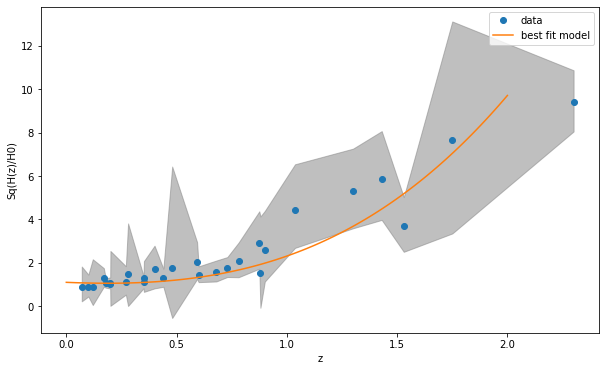

In [89]:

# Y_matrix = np.array([df['hz0'].iloc[4], df['hz0'].iloc[5], df['hz0'].iloc[9]]).T
# # Y = MX
# M_matrix = np.array([   [df['a'].iloc[4], df['b'].iloc[4], 1], 
#                         [df['a'].iloc[5], df['b'].iloc[5], 1], 
#                         [df['a'].iloc[9], df['b'].iloc[9], 1]])

# X = np.linalg.solve(M_matrix, Y_matrix)
# print(X)
def solve_rows(row1, row2, row3):
    Y_matrix = np.array([df['hz0'].iloc[row1], df['hz0'].iloc[row2], df['hz0'].iloc[row3]]).T
    M_matrix = np.array([   [df['a'].iloc[row1], df['b'].iloc[row1], 1], 
                            [df['a'].iloc[row2], df['b'].iloc[row2], 1], 
                            [df['a'].iloc[row3], df['b'].iloc[row3], 1]])
    X = np.linalg.solve(M_matrix, Y_matrix)
    return X
    # yield X
    # Y_confirm = np.matmul(M_matrix, X)
    # yield np.allclose(Y_matrix, Y_confirm)
f = solve_rows(4, 5, 9)
X = f
print(f'X_matrix: {X}')
# print(X)
# print(next(f))
plot_tolerances(*X)
# print(f'Y_matrix: {Y_matrix}')
# print(f'Y_confirm: {Y_confirm}')
# print(np.allclose(Y_matrix, Y_confirm))

X: [ 0.73432639 -1.309702    1.67147187]
Initial loss_ul: 3.323131799127675
0) Best fit values of m, k, and l:[0.11421142 0.51033167 0.23751755]
1) Best fit values of m, k, and l:[0.09722551 0.54323476 0.06524422]
1.5) Best fit values of m, k, and l:[ 0.0158797   0.757422   -0.15538738]
2) Best fit values of m, k, and l:[0.20361549 0.25047957 0.28399507]
               m      k      l  Var_m  Var_k  Var_l  Loss_0  Loss_1  Loss_1_5  \
Loss used                                                                       
Loss_0     0.114  0.510  0.238  0.065  0.461  0.303  12.674   6.862     1.329   
Loss_1     0.097  0.543  0.065  0.002  0.014  0.013  11.796   5.995     0.793   
Loss_1_5   0.016  0.757 -0.155  0.018  0.239  0.510  13.223   7.146     0.719   
Loss_2     0.204  0.250  0.284  0.013  0.200  0.459  12.265   6.516     0.895   

           Loss_2  Loss_U_L  
Loss used                    
Loss_0      1.849     0.776  
Loss_1      1.143     0.113  
Loss_1_5    1.184     0.016  
Loss_2

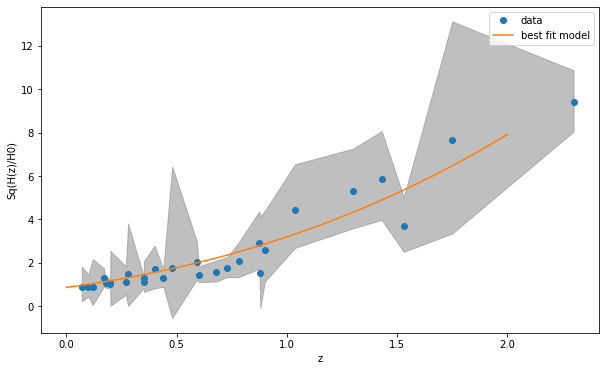

For loss_1


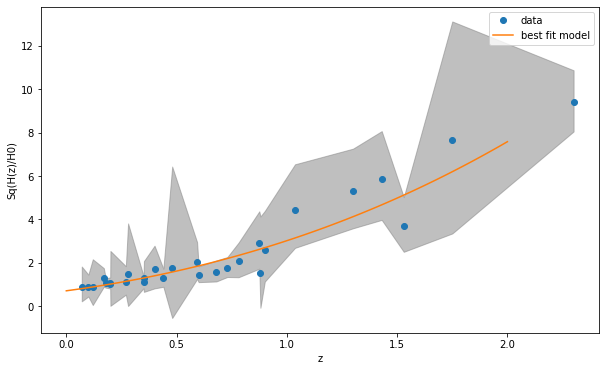

For loss_1.5


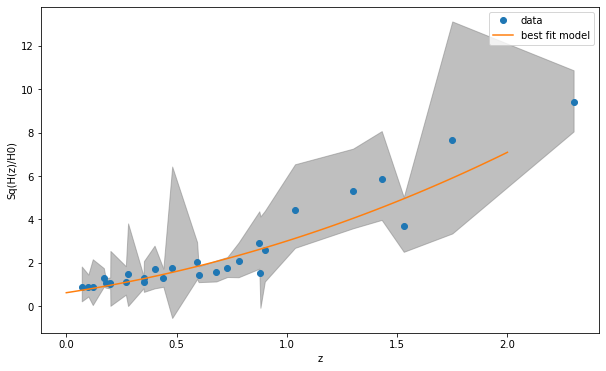

For loss_2


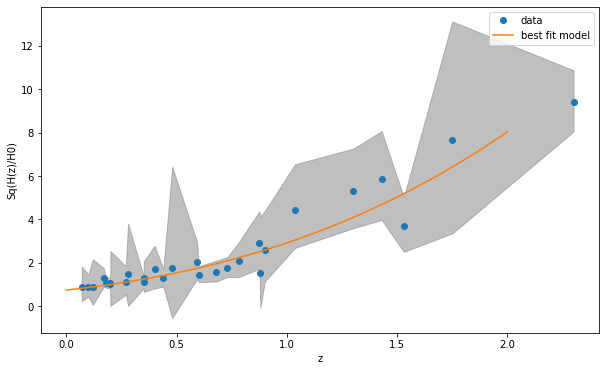

,m,k,l,Var_m,Var_k,Var_l,Loss_0,Loss_1,Loss_1_5,Loss_2,Loss_U_L
Loss used,,,,,,,,,,,
Loss_0,0.114,0.510,0.238,0.065,0.461,0.303,12.674,6.862,1.329,1.849,0.776
Loss_1,0.097,0.543,0.065,0.002,0.014,0.013,11.796,5.995,0.793,1.143,0.113
Loss_1_5,0.016,0.757,-0.155,0.018,0.239,0.510,13.223,7.146,0.719,1.184,0.016
Loss_2,0.204,0.250,0.284,0.013,0.200,0.459,12.265,6.516,0.895,1.060,0.159


In [90]:
X = solve_rows(4, 5, 9)
# Now initialize the parameters with the values of m, k, and l, define loss function and use gradient descent to minimize the loss function
def loss_0(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        loss[i] = abs(v[i] - df['hz0'][i])
    return np.sum(loss) 

def loss_1(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hz1'][i]:
            loss[i] = (v[i] - df['hz1'][i])
        elif v[i] < df['hz-1'][i]:
            loss[i] = (df['hz-1'][i] - v[i])
        else:
            loss[i] = 0
    return np.sum(loss)

def loss_1_5(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hz1.5'][i]:
            loss[i] = (v[i] - df['hz1.5'][i])**1.8
        elif v[i] < df['hz-1.5'][i]:
            loss[i] = (df['hz-1.5'][i] - v[i])**1.8
        else:
            loss[i] = 0
    return np.sum(loss)

def loss_2(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hz2'][i]:
            loss[i] = (v[i] - df['hz2'][i])
        elif v[i] < df['hz-2'][i]:
            loss[i] = (df['hz-2'][i] - v[i])
        else:
            loss[i] = 0
    return np.sum(loss)

def loss_ul(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hzu'][i]:
            loss[i] = (v[i] - df['hzu'][i])
        elif v[i] < df['hzl'][i]:
            loss[i] = (df['hzl'][i] - v[i])
        else:
            loss[i] = 0
    return np.sum(loss)

# We defined the loss functions for the four different tolerances

# loss_0: The sum of the absolute differences between the model and the central value of the tolerance
# loss_1: The sum of the differences prediced values and hz1 and hz-1 if the predicted value is outside the bounds
# loss_1_5, loss_2, loss_ul: Similar to loss_1 but for hz1.5, hz2, and hzu, hzl respectively

from scipy.optimize import minimize
def fit_values(X):
    print(f'X: {X}')
    print(f'Initial loss_ul: {loss_ul(X)}')
    result_0 = minimize(loss_0, X)
    # Report the variance of the parameters
    print(f'0) Best fit values of m, k, and l:{result_0.x}')
    # print(f'Loss_0 = {loss_0(result_0.x)};\n Loss_1 = {loss_1(result_0.x)};\n loss_1_5 = {loss_1_5(result_0.x)};\n Loss_2 = {loss_2(result_0.x)}')
    # print(f'Variance of m: {result_0.hess_inv[0,0]}, Variance of k = {result_0.hess_inv[1,1]}, Variance of l = {result_0.hess_inv[2,2]}\n')

    result_1 = minimize(loss_1, X)
    print(f'1) Best fit values of m, k, and l:{result_1.x}')
    # print(f'Loss_0 = {loss_0(result_1.x)};\n Loss_1 = {loss_1(result_1.x)};\n loss_1_5 = {loss_1_5(result_1.x)};\n Loss_2 = {loss_2(result_1.x)}')
    # print(f'Variance of m: {result_1.hess_inv[0,0]}, Variance of k = {result_1.hess_inv[1,1]}, Variance of l = {result_1.hess_inv[2,2]}\n')

    result_1_5 = minimize(loss_1_5, X)
    print(f'1.5) Best fit values of m, k, and l:{result_1_5.x}')
    # print(f'Loss_0 = {loss_0(result_1_5.x)};\n Loss_1 = {loss_1(result_1_5.x)};\n loss_1_5 = {loss_1_5(result_1_5.x)};\n Loss_2 = {loss_2(result_1_5.x)}')
    # print(f'Variance of m: {result_1_5.hess_inv[0,0]}, Variance of k = {result_1_5.hess_inv[1,1]}, Variance of l = {result_1_5.hess_inv[2,2]}\n')

    result_2 = minimize(loss_2, X)
    print(f'2) Best fit values of m, k, and l:{result_2.x}')
    # print(f'Loss_0 = {loss_0(result_2.x)};\n Loss_1 = {loss_1(result_2.x)};\n loss_1_5 = {loss_1_5(result_2.x)};\n Loss_2 = {loss_2(result_2.x)}')
    # print(f'Variance of m: {result_2.hess_inv[0,0]}, Variance of k = {result_2.hess_inv[1,1]}, Variance of l = {result_2.hess_inv[2,2]}\n')


    # Tabulate the results using dataframes
    # Rows: Loss_0, Loss_1, Loss_1_5, Loss_2
    # Columns: Best fit values of m, k, and l; Loss_0, Loss_1, Loss_1_5, Loss_2; Variance of m, k, and l, Everything rounded to 3 decimal places
    df_results = pd.DataFrame({'m':[result_0.x[0], result_1.x[0], result_1_5.x[0], result_2.x[0]],
                        'k':[result_0.x[1], result_1.x[1], result_1_5.x[1], result_2.x[1]],
                        'l':[result_0.x[2], result_1.x[2], result_1_5.x[2], result_2.x[2]],
                        'Var_m':[result_0.hess_inv[0,0], result_1.hess_inv[0,0], result_1_5.hess_inv[0,0], result_2.hess_inv[0,0]],
                        'Var_k':[result_0.hess_inv[1,1], result_1.hess_inv[1,1], result_1_5.hess_inv[1,1], result_2.hess_inv[1,1]],
                        'Var_l':[result_0.hess_inv[2,2], result_1.hess_inv[2,2], result_1_5.hess_inv[2,2], result_2.hess_inv[2,2]],
                        'Loss_0':[loss_0(result_0.x), loss_0(result_1.x), loss_0(result_1_5.x), loss_0(result_2.x)], 
                        'Loss_1':[loss_1(result_0.x), loss_1(result_1.x), loss_1(result_1_5.x), loss_1(result_2.x)], 
                        'Loss_1_5':[loss_1_5(result_0.x), loss_1_5(result_1.x), loss_1_5(result_1_5.x), loss_1_5(result_2.x)], 
                        'Loss_2':[loss_2(result_0.x), loss_2(result_1.x), loss_2(result_1_5.x), loss_2(result_2.x)], 
                        'Loss_U_L':[loss_ul(result_0.x), loss_ul(result_1.x), loss_ul(result_1_5.x), loss_ul(result_2.x)]
                        })
    #THE last column must be hilighted
    df_results = df_results.round(3)
    df_results.style.highlight_max(color = 'lightgreen', axis = 0)
    df_results.index = ['Loss_0', 'Loss_1', 'Loss_1_5', 'Loss_2']
    # The origin cell must say - 'Method'
    df_results.index.name = 'Loss used'

    # print(df_results)
    df_results.to_csv('results_1.csv')
    # Show df_results
    print(df_results)
    
    print('For loss_0')
    plot_tolerances(result_0.x[0], result_0.x[1], result_0.x[2])
    print('For loss_1')
    plot_tolerances(result_1.x[0], result_1.x[1], result_1.x[2])
    print('For loss_1.5')
    plot_tolerances(result_1_5.x[0], result_1_5.x[1], result_1_5.x[2])
    print('For loss_2')
    plot_tolerances(result_2.x[0], result_2.x[1], result_2.x[2])
    return df_results

fit_values(X)

X: [ 0.01601377  0.82218312 -0.12372078]
Initial loss_ul: 0.9380052030207713
0) Best fit values of m, k, and l:[ 0.01601377  0.82218312 -0.12372078]
1) Best fit values of m, k, and l:[ 0.0463873   0.73374216 -0.18490425]
1.5) Best fit values of m, k, and l:[ 0.01587969  0.75742207 -0.1553876 ]
2) Best fit values of m, k, and l:[0.15151336 0.38381131 0.16630651]
               m      k      l  Var_m  Var_k  Var_l  Loss_0  Loss_1  Loss_1_5  \
Loss used                                                                       
Loss_0     0.016  0.822 -0.124  1.000  1.000  1.000  11.842   6.438     1.495   
Loss_1     0.046  0.734 -0.185  0.043  0.317  0.136  12.188   6.079     0.968   
Loss_1_5   0.016  0.757 -0.155  0.018  0.239  0.508  13.223   7.146     0.719   
Loss_2     0.152  0.384  0.166  0.227  0.607  0.042  12.137   6.244     0.799   

           Loss_2  Loss_U_L  
Loss used                    
Loss_0      2.004     0.938  
Loss_1      1.356     0.294  
Loss_1_5    1.184     0.016  

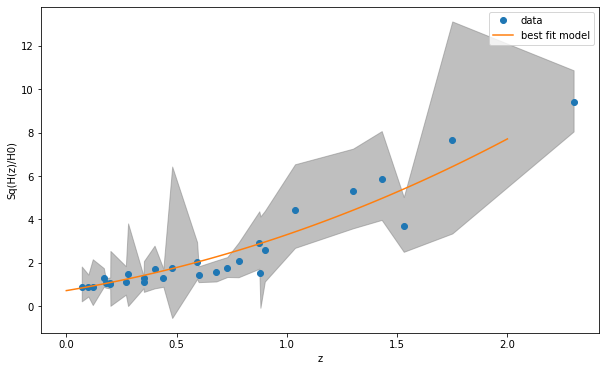

For loss_1


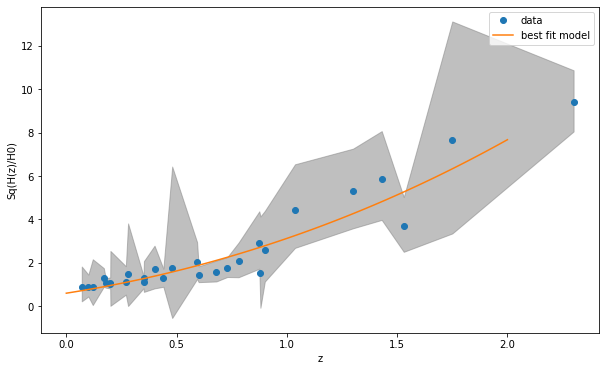

For loss_1.5


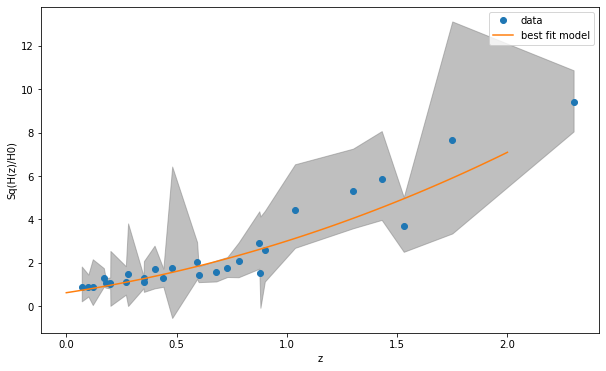

For loss_2


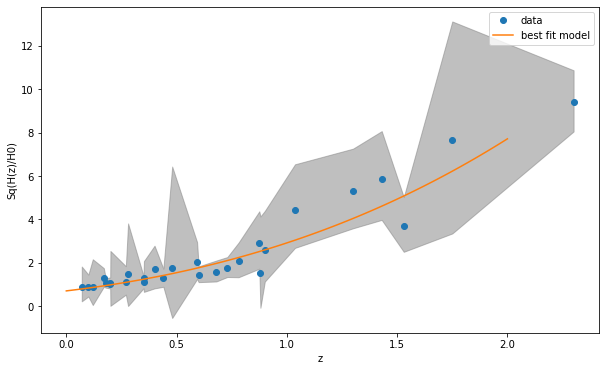

,m,k,l,Var_m,Var_k,Var_l,Loss_0,Loss_1,Loss_1_5,Loss_2,Loss_U_L
Loss used,,,,,,,,,,,
Loss_0,0.016,0.822,-0.124,1.000,1.000,1.000,11.842,6.438,1.495,2.004,0.938
Loss_1,0.046,0.734,-0.185,0.043,0.317,0.136,12.188,6.079,0.968,1.356,0.294
Loss_1_5,0.016,0.757,-0.155,0.018,0.239,0.508,13.223,7.146,0.719,1.184,0.016
Loss_2,0.152,0.384,0.166,0.227,0.607,0.042,12.137,6.244,0.799,1.045,0.051


In [91]:
# 7, 14, 19
X = solve_rows(1, 14, 27)

# Now initialize the parameters with the values of m, k, and l, define loss function and use gradient descent to minimize the loss function
def loss_0(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        loss[i] = abs(v[i] - df['hz0'][i])
    return np.sum(loss) 

def loss_1(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hz1'][i]:
            loss[i] = (v[i] - df['hz1'][i])
        elif v[i] < df['hz-1'][i]:
            loss[i] = (df['hz-1'][i] - v[i])
        else:
            loss[i] = 0
    return np.sum(loss)

def loss_1_5(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hz1.5'][i]:
            loss[i] = (v[i] - df['hz1.5'][i])**1.8
        elif v[i] < df['hz-1.5'][i]:
            loss[i] = (df['hz-1.5'][i] - v[i])**1.8
        else:
            loss[i] = 0
    return np.sum(loss)

def loss_2(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hz2'][i]:
            loss[i] = (v[i] - df['hz2'][i])
        elif v[i] < df['hz-2'][i]:
            loss[i] = (df['hz-2'][i] - v[i])
        else:
            loss[i] = 0
    return np.sum(loss)

def loss_ul(params):
    m, k, l = params
    v = model(df['z'], m, k, l)
    loss = np.zeros(len(v))
    # print(f'len(v): {len(v)}')
    for i in range(len(v)):
        if v[i] > df['hzu'][i]:
            loss[i] = (v[i] - df['hzu'][i])
        elif v[i] < df['hzl'][i]:
            loss[i] = (df['hzl'][i] - v[i])
        else:
            loss[i] = 0
    return np.sum(loss)

from scipy.optimize import minimize
def fit_values(X):
    print(f'X: {X}')
    print(f'Initial loss_ul: {loss_ul(X)}')
    result_0 = minimize(loss_0, X)
    # Report the variance of the parameters
    print(f'0) Best fit values of m, k, and l:{result_0.x}')
    # print(f'Loss_0 = {loss_0(result_0.x)};\n Loss_1 = {loss_1(result_0.x)};\n loss_1_5 = {loss_1_5(result_0.x)};\n Loss_2 = {loss_2(result_0.x)}')
    # print(f'Variance of m: {result_0.hess_inv[0,0]}, Variance of k = {result_0.hess_inv[1,1]}, Variance of l = {result_0.hess_inv[2,2]}\n')

    result_1 = minimize(loss_1, X)
    print(f'1) Best fit values of m, k, and l:{result_1.x}')
    # print(f'Loss_0 = {loss_0(result_1.x)};\n Loss_1 = {loss_1(result_1.x)};\n loss_1_5 = {loss_1_5(result_1.x)};\n Loss_2 = {loss_2(result_1.x)}')
    # print(f'Variance of m: {result_1.hess_inv[0,0]}, Variance of k = {result_1.hess_inv[1,1]}, Variance of l = {result_1.hess_inv[2,2]}\n')

    result_1_5 = minimize(loss_1_5, X)
    print(f'1.5) Best fit values of m, k, and l:{result_1_5.x}')
    # print(f'Loss_0 = {loss_0(result_1_5.x)};\n Loss_1 = {loss_1(result_1_5.x)};\n loss_1_5 = {loss_1_5(result_1_5.x)};\n Loss_2 = {loss_2(result_1_5.x)}')
    # print(f'Variance of m: {result_1_5.hess_inv[0,0]}, Variance of k = {result_1_5.hess_inv[1,1]}, Variance of l = {result_1_5.hess_inv[2,2]}\n')

    result_2 = minimize(loss_2, X)
    print(f'2) Best fit values of m, k, and l:{result_2.x}')
    # print(f'Loss_0 = {loss_0(result_2.x)};\n Loss_1 = {loss_1(result_2.x)};\n loss_1_5 = {loss_1_5(result_2.x)};\n Loss_2 = {loss_2(result_2.x)}')
    # print(f'Variance of m: {result_2.hess_inv[0,0]}, Variance of k = {result_2.hess_inv[1,1]}, Variance of l = {result_2.hess_inv[2,2]}\n')


    # Tabulate the results using dataframes
    # Rows: Loss_0, Loss_1, Loss_1_5, Loss_2
    # Columns: Best fit values of m, k, and l; Loss_0, Loss_1, Loss_1_5, Loss_2; Variance of m, k, and l, Everything rounded to 3 decimal places
    df_results = pd.DataFrame({'m':[result_0.x[0], result_1.x[0], result_1_5.x[0], result_2.x[0]],
                        'k':[result_0.x[1], result_1.x[1], result_1_5.x[1], result_2.x[1]],
                        'l':[result_0.x[2], result_1.x[2], result_1_5.x[2], result_2.x[2]],
                        'Var_m':[result_0.hess_inv[0,0], result_1.hess_inv[0,0], result_1_5.hess_inv[0,0], result_2.hess_inv[0,0]],
                        'Var_k':[result_0.hess_inv[1,1], result_1.hess_inv[1,1], result_1_5.hess_inv[1,1], result_2.hess_inv[1,1]],
                        'Var_l':[result_0.hess_inv[2,2], result_1.hess_inv[2,2], result_1_5.hess_inv[2,2], result_2.hess_inv[2,2]],
                        'Loss_0':[loss_0(result_0.x), loss_0(result_1.x), loss_0(result_1_5.x), loss_0(result_2.x)], 
                        'Loss_1':[loss_1(result_0.x), loss_1(result_1.x), loss_1(result_1_5.x), loss_1(result_2.x)], 
                        'Loss_1_5':[loss_1_5(result_0.x), loss_1_5(result_1.x), loss_1_5(result_1_5.x), loss_1_5(result_2.x)], 
                        'Loss_2':[loss_2(result_0.x), loss_2(result_1.x), loss_2(result_1_5.x), loss_2(result_2.x)], 
                        'Loss_U_L':[loss_ul(result_0.x), loss_ul(result_1.x), loss_ul(result_1_5.x), loss_ul(result_2.x)]
                        })
    #THE last column must be hilighted
    df_results = df_results.round(3)
    df_results.style.highlight_max(color = 'lightgreen', axis = 0)
    df_results.index = ['Loss_0', 'Loss_1', 'Loss_1_5', 'Loss_2']
    # The origin cell must say - 'Method'
    df_results.index.name = 'Loss used'

    # print(df_results)
    df_results.to_csv('results_2.csv')
    # Show df_results
    print(df_results)
    
    print('For loss_0')
    plot_tolerances(result_0.x[0], result_0.x[1], result_0.x[2])
    print('For loss_1')
    plot_tolerances(result_1.x[0], result_1.x[1], result_1.x[2])
    print('For loss_1.5')
    plot_tolerances(result_1_5.x[0], result_1_5.x[1], result_1_5.x[2])
    print('For loss_2')
    plot_tolerances(result_2.x[0], result_2.x[1], result_2.x[2])
    return df_results

fit_values(X)

## Another methos from scratch

### Training a regression model to predict the value of H(z) for a given redshift z

Coefficients of a and b: (0.05816596738860086, 0.7215457727583325)
Intercept: -0.15970339709736026
Coefficients of the polynomial regression lr: [ 0.         -1.01086496  3.84430015 -0.79429996]
Intercept: 1.1155112011207127
c3, c2, c1, c0: [ 0.         -1.01086496  3.84430015 -0.79429996], 1.1155112011207127
Sq(H(z)/H0) = 3.8443001505113057*z^3 + -1.0108649567354058*z^2 + 0.0*z + 1.1155112011207127


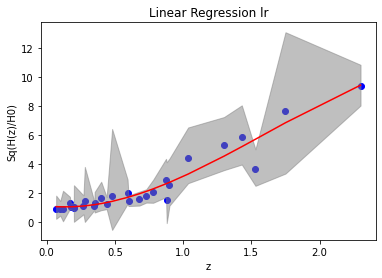

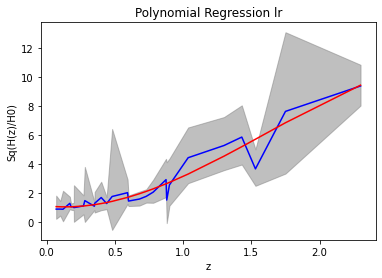

In [92]:
### Training a regression lr to predict the value of H(z) for a given redshift z
# Polynomial regression]
from sklearn.linear_model import LinearRegression

X = df[['a', 'b']]
y = df['hz0']

lr = LinearRegression()
lr.fit(X, y)

# find the coefficient of a and b, and the intercept
coeff_a, coeff_b, intercept = lr.coef_[0], lr.coef_[1], lr.intercept_
print(f'Coefficients of a and b: {coeff_a, coeff_b}')
print(f'Intercept: {intercept}')

X = df['z']
y = df['hz0']
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X = X.values.reshape(-1, 1)
X_poly = poly.fit_transform(X)
lr = LinearRegression()

lr.fit(X_poly, y)
print(f'Coefficients of the polynomial regression lr: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')
# y = c3*x^3 + c2*x^2 + c1*x + c0
c3, c2, c1, c0 = lr.coef_[2], lr.coef_[1], lr.coef_[0], lr.intercept_
print(f'c3, c2, c1, c0: {lr.coef_}, {lr.intercept_}')
print(f'Sq(H(z)/H0) = {c3}*z^3 + {c2}*z^2 + {c1}*z + {c0}')
# Plot the regression lr
plt.scatter(df['z'], df['hz0'], color='blue')
plt.plot(df['z'], lr.predict(X_poly), color='red')
plt.xlabel('z')
plt.ylabel('Sq(H(z)/H0)')
plt.fill_between(df['z'], df['hzl'], df['hzu'], color='gray', alpha=0.5)    
plt.title('Linear Regression lr')
plt.show()


# Plot the polynomial regression lr
plt.plot(df['z'], df['hz0'], color='blue')
plt.plot(df['z'], lr.predict(X_poly), color='red')
plt.xlabel('z')
plt.ylabel('Sq(H(z)/H0)')
plt.fill_between(df['z'], df['hzl'], df['hzu'], color='gray', alpha=0.5)    
plt.title('Polynomial Regression lr')
plt.show()





## Inbuilt method - Best values for loss_0


[0.18538385 0.22299174 0.37838579]
[1.76918853 6.22256534 7.52187394]
value of m: 0.18538385075663577 +/- 1.7691885305482016
value of k: 0.22299174063677957 +/- 6.222565339452787
value of l: 0.378385794319299 +/- 7.52187394161087
Loss_0: 12.053194362441577
Loss_1: 6.292544853737006
Loss_1_5: 0.9990243336782835
Loss_2: 1.2757499560336967
Loss_U_L: 0.0


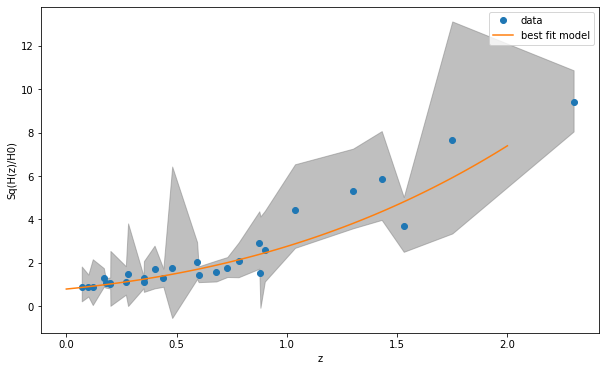

In [93]:

# To find the best fit values of m, k, and l, we can use the least squares method.
from scipy.optimize import curve_fit

popt, pcov = curve_fit(model, df['z'], df['hz0'], sigma=df['e'], absolute_sigma=True)
print(popt)
print(np.sqrt(np.diag(pcov)))
print(f'value of m: {popt[0]} +/- {np.sqrt(pcov[0,0])}')
print(f'value of k: {popt[1]} +/- {np.sqrt(pcov[1,1])}')
print(f'value of l: {popt[2]} +/- {np.sqrt(pcov[2,2])}')

def performance(m, k, l):
    print(f'Loss_0: {loss_0([m, k, l])}')
    print(f'Loss_1: {loss_1([m, k, l])}')
    print(f'Loss_1_5: {loss_1_5([m, k, l])}')
    print(f'Loss_2: {loss_2([m, k, l])}')
    print(f'Loss_U_L: {loss_ul([m, k, l])}')
    plot_tolerances(m, k, l)

performance(*popt)

Best fit values of m, k, and l:[0.17394948 0.25353387 0.39313364]
Loss = 11.919106452171203
value of m: 0.17394948120434472
value of k: 0.25353386991145194
value of l: 0.3931336429818136
Imp: Ul loss: 0.0
Loss_0 = 11.919106452171203
Loss_1 = 6.259306828136575
Loss_1_5 = 0.9157507916553524
 Loss_2 = 1.2001290815751877


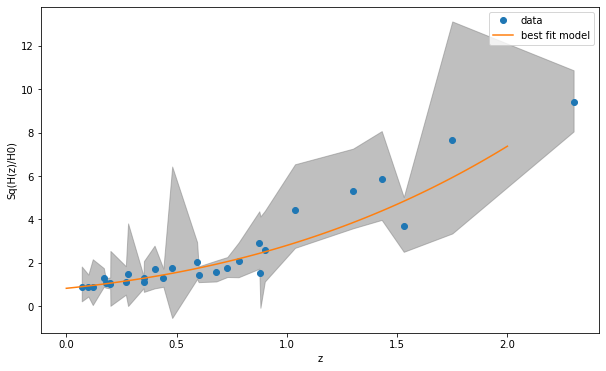

Best fit values of m, k, and l:[0.09632667 0.54621316 0.06278698]
Loss = 5.993845530863082
value of m: 0.09632666915414806
value of k: 0.5462131578102738
value of l: 0.06278698153679108
Imp: Ul loss: 0.11677541792233459
Loss_0 = 11.795074876481484
Loss_1 = 5.993845530863082
Loss_1_5 = 0.7947163048218377
 Loss_2 = 1.1459662408581206


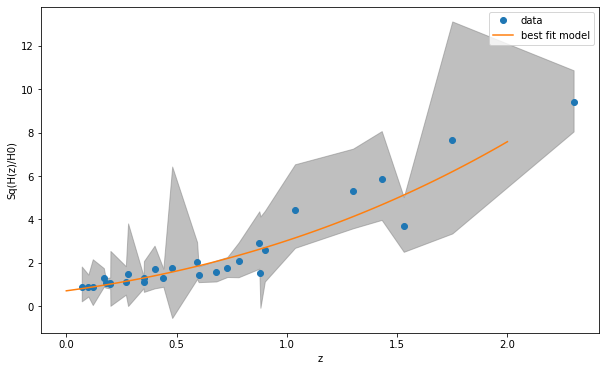

Best fit values of m, k, and l:[ 0.01587978  0.75742175 -0.15538736]
Loss = 0.7193756146102561
value of m: 0.015879783033700932
value of k: 0.7574217535705703
value of l: -0.15538736333858824
Imp: Ul loss: 0.01608910311421985
Loss_0 = 13.223222285965958
Loss_1 = 7.145757542130748
Loss_1_5 = 0.7193756146102561
 Loss_2 = 1.1835844270271343


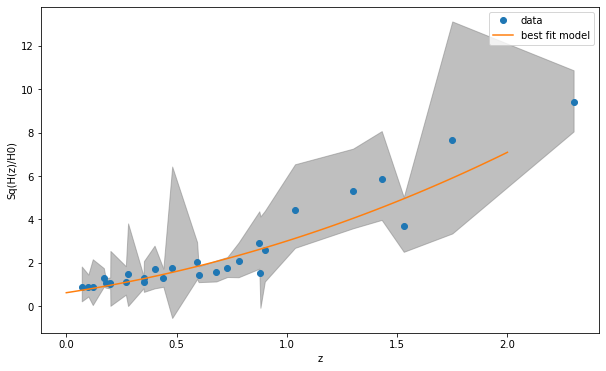

Best fit values of m, k, and l:[0.20492585 0.21795869 0.38587462]
Loss = 1.032780384428395
value of m: 0.20492585020385484
value of k: 0.21795868943008592
value of l: 0.3858746182510864
Imp: Ul loss: 0.07434435948139573
Loss_0 = 12.089478485656812
Loss_1 = 6.398719932117785
Loss_1_5 = 0.8310312346471542
 Loss_2 = 1.032780384428395


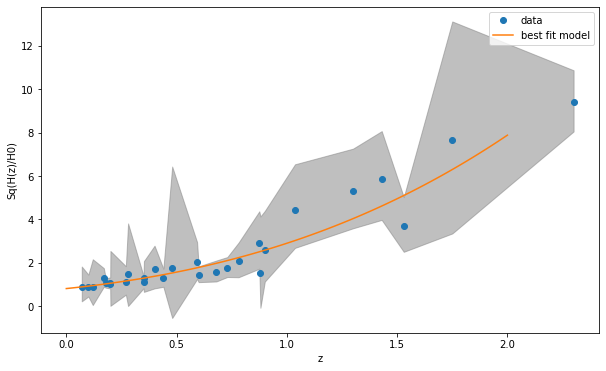

In [96]:
from scipy.optimize import minimize
def performance_of_loss(loss, popt):
    result = minimize(loss, popt)
    print(f'Best fit values of m, k, and l:{result.x}')
    print(f'Loss = {loss(result.x)}')

    # print the best fit values of m, k, and l
    print(f'value of m: {result.x[0]}')
    print(f'value of k: {result.x[1]}')
    print(f'value of l: {result.x[2]}')


    print(f'Imp: Ul loss: {loss_ul(result.x)}')
    print(f'Loss_0 = {loss_0(result.x)}')
    print(f'Loss_1 = {loss_1(result.x)}')
    print(f'Loss_1_5 = {loss_1_5(result.x)}')
    print(f' Loss_2 = {loss_2(result.x)}')
    # print(f'Loss_U_L = {loss_ul(result.x)}')
    plot_tolerances(*result.x)
'''
    # plot the data and the best fit model
    plt.errorbar(df['z'], df['hz0'], yerr=df['e'], fmt='o', label='data')
    z = np.linspace(0, 2, 100)
    plt.plot(z, model(z, *result.x), label='best fit model')
    plt.xlabel('z')
    plt.ylabel('H(z)/H0')
    plt.legend()
    plt.show()

    # plot the residuals
    plt.errorbar(df['z'], model(df['z'], *result.x) - df['hz0'], yerr=df['e'], fmt='o')
    plt.axhline(0, color='black', lw=1)
    plt.xlabel('z')
    plt.ylabel('residuals')
    plt.show()
'''
performance_of_loss(loss_0, popt)
performance_of_loss(loss_1, popt)
performance_of_loss(loss_1_5, popt)
performance_of_loss(loss_2, popt)

### Best Plot:

Best fit values of m, k, and l:[0.17394948 0.25353387 0.39313364]
Loss = 11.919106452171203
value of m: 0.17394948120434472
value of k: 0.25353386991145194
value of l: 0.3931336429818136
Imp: Ul loss: 0.0
Loss_0 = 11.919106452171203
Loss_1 = 6.259306828136575
Loss_1_5 = 0.9157507916553524
 Loss_2 = 1.2001290815751877


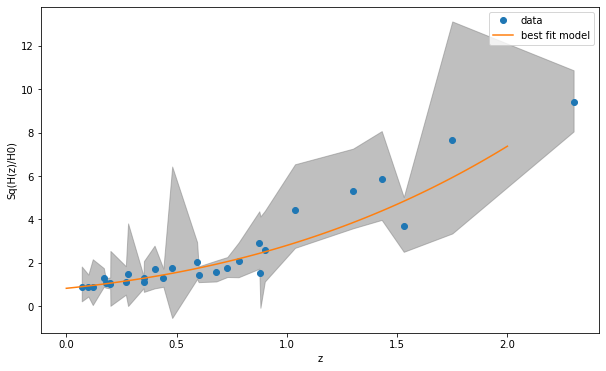

In [97]:
performance_of_loss(loss_0, popt)

Now, final submittion plotting: 


## The Best plot Report

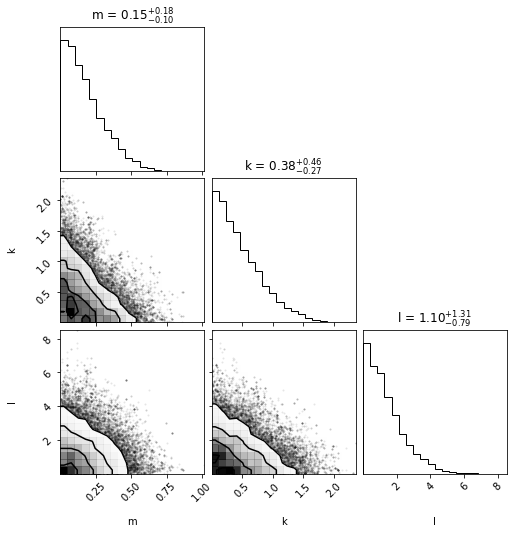

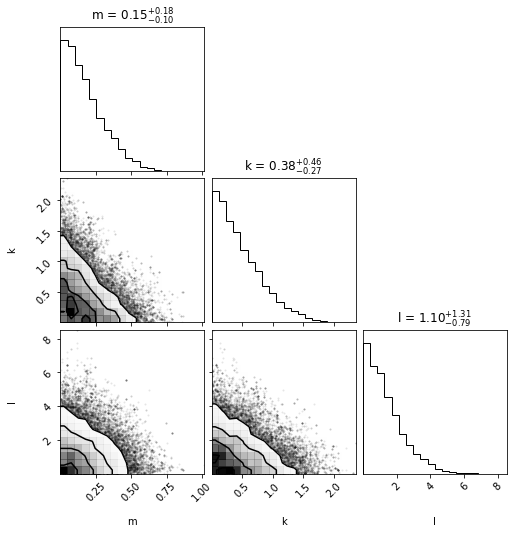

1 Sigma, 2 Sigma, 3 Sigma for m: (0.14862137417644514, 0.17836653456308624, 0.10460535929062678)
1 Sigma, 2 Sigma, 3 Sigma for k: (0.38233698474828565, 0.46265849025831424, 0.2728931771475178)
1 Sigma, 2 Sigma, 3 Sigma for l: (1.101405193033406, 1.3080425476624828, 0.7889474105506069)
                    m         k         l
Uncertainty                              
1 Sigma      0.148621  0.382337  1.101405
2 Sigma      0.178367  0.462658  1.308043
3 Sigma      0.104605  0.272893  0.788947


In [99]:
# Best fit values of m, k, and l:[0.17394948 0.25353387 0.39313364]
# plot 1 and 2D marginalized probability distributions for all three parameters and report uncertainty corresponding to 1,2 and 3 


def model(z, m, k, l):
    return (m*(1+z)**3 + k*(1+z)**2 + l)

m_final, k_final, l_final = 0.17394948, 0.25353387, 0.39313364

# To plot 1D marginalized probability distributions for all three parameters, we can use the corner module
# !pip install corner
import corner
ndim, nwalkers = 3, 100
pos = [popt + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

def lnprob(p):
    if p[0] > 0 and p[1] > 0 and p[2] > 0:
        return -0.5 * np.sum((model(df['z'], *p) - df['hz0'])**2 / df['e']**2)
    return -np.inf

# !pip install emcee
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(pos, 500)

samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

# 1D plot : 
fig = corner.corner(samples, labels=['m', 'k', 'l'], show_titles=True)
plt.show()


# Report the uncertainty corresponding to 1, 2, and 3 sigma
m_mcmc, k_mcmc, l_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
print(f'1 Sigma, 2 Sigma, 3 Sigma for m: {m_mcmc}')
print(f'1 Sigma, 2 Sigma, 3 Sigma for k: {k_mcmc}')
print(f'1 Sigma, 2 Sigma, 3 Sigma for l: {l_mcmc}')

# Tabulate the results
df_cf = pd.DataFrame({'m':m_mcmc, 'k':k_mcmc, 'l':l_mcmc})
df_cf.index = ['1 Sigma', '2 Sigma', '3 Sigma']
df_cf.index.name = 'Uncertainty'
print(df_cf)

In [100]:
df_cf

,m,k,l
Uncertainty,,,
1 Sigma,0.148621,0.382337,1.101405
2 Sigma,0.178367,0.462658,1.308043
3 Sigma,0.104605,0.272893,0.788947


## The Runner up plot (Second best)

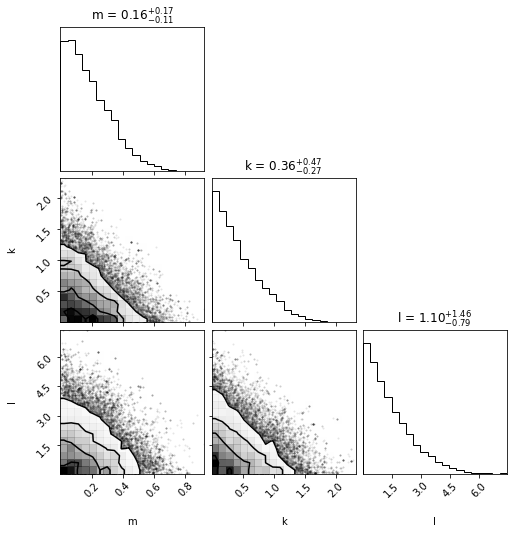

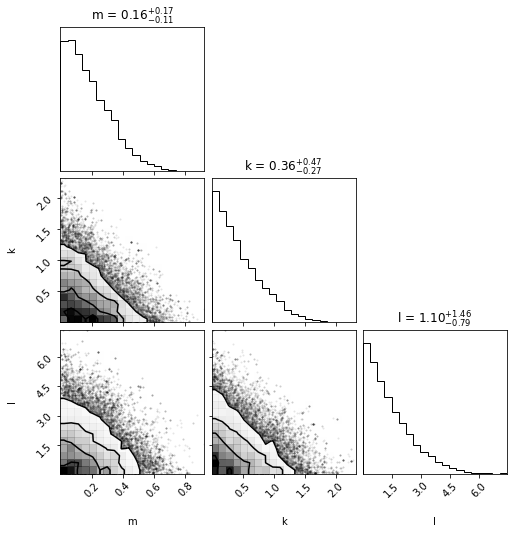

1 Sigma, 2 Sigma, 3 Sigma for m: (0.1580734379239568, 0.17411261679603837, 0.10958886749054086)
1 Sigma, 2 Sigma, 3 Sigma for k: (0.36348264000390484, 0.4735712517412074, 0.266253299181184)
1 Sigma, 2 Sigma, 3 Sigma for l: (1.098613082223817, 1.4574218892943143, 0.7938962930388165)
                    m         k         l
Uncertainty                              
1 Sigma      0.158073  0.363483  1.098613
2 Sigma      0.174113  0.473571  1.457422
3 Sigma      0.109589  0.266253  0.793896


In [98]:
# Best fit values of m, k, and l:[ 0.0158797   0.757422   -0.15538738]
# plot 1 and 2D marginalized probability distributions for all three parameters and report uncertainty corresponding to 1,2 and 3 


def model(z, m, k, l):
    return (m*(1+z)**3 + k*(1+z)**2 + l)

m_final, k_final, l_final = 0.0158797, 0.757422, -0.15538738

# To plot 1D marginalized probability distributions for all three parameters, we can use the corner module
# !pip install corner
import corner
ndim, nwalkers = 3, 100
pos = [popt + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

def lnprob(p):
    if p[0] > 0 and p[1] > 0 and p[2] > 0:
        return -0.5 * np.sum((model(df['z'], *p) - df['hz0'])**2 / df['e']**2)
    return -np.inf

# !pip install emcee
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(pos, 500)

samples = sampler.chain[:, 50:, :].reshape((-1, ndim))


# 1D plot : 
fig = corner.corner(samples, labels=['m', 'k', 'l'], show_titles=True)
plt.show()




# Report the uncertainty corresponding to 1, 2, and 3 sigma
m_mcmc, k_mcmc, l_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
print(f'1 Sigma, 2 Sigma, 3 Sigma for m: {m_mcmc}')
print(f'1 Sigma, 2 Sigma, 3 Sigma for k: {k_mcmc}')
print(f'1 Sigma, 2 Sigma, 3 Sigma for l: {l_mcmc}')

# Tabulate the results
df_le = pd.DataFrame({'m':m_mcmc, 'k':k_mcmc, 'l':l_mcmc})
df_le.index = ['1 Sigma', '2 Sigma', '3 Sigma']
df_le.index.name = 'Uncertainty'
print(df_le)


In [101]:
df_le

,m,k,l
Uncertainty,,,
1 Sigma,0.158073,0.363483,1.098613
2 Sigma,0.174113,0.473571,1.457422
3 Sigma,0.109589,0.266253,0.793896
